In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

In [ ]:
!yolo task=detect mode=predict model="/Users/Theo/Desktop/seg_models/big_seg_model_v1/weights/best.pt" conf=0.5 source="/Users/Theo/Desktop/seg_test/*.jpg"




In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("/Users/Theo/Desktop/seg_models/big_seg_model_v1/results.csv", sep = ',')
df2 = pd.read_csv("/Users/Theo/Desktop/seg_models/big_seg_model_v2/results.csv", sep = ',')

In [3]:
df1.head()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,2.18420,4.35460,2.20930,0.21008,0.30704,0.17374,0.06827,1.64210,19.58500,1.69180,0.000093,0.000093,0.000093
1,2,0.78257,1.93460,1.15820,0.83644,0.76890,0.84642,0.72475,0.59824,2.34170,1.07690,0.000189,0.000189,0.000189
2,3,0.61506,1.30800,1.05260,0.90984,0.84974,0.87992,0.78803,0.56349,1.52650,1.01980,0.000281,0.000281,0.000281
3,4,0.52191,1.00140,0.98560,0.75540,0.84647,0.89395,0.77706,0.57526,1.24430,1.03960,0.000369,0.000369,0.000369
4,5,0.52880,0.89581,0.98757,0.95260,0.87534,0.91929,0.80516,0.56843,0.98119,0.98796,0.000454,0.000454,0.000454


In [4]:
df2.head()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,2.33770,4.90600,2.31750,0.05525,0.35376,0.06827,0.03685,1.32510,4.86920,1.56980,0.000076,0.000076,0.000076
1,2,0.86599,2.29920,1.22380,0.51894,0.55503,0.48837,0.36160,0.88754,3.75800,1.44460,0.000156,0.000156,0.000156
2,3,0.58319,1.33650,1.01710,0.58527,0.73142,0.67550,0.58152,0.55875,1.80440,1.08340,0.000232,0.000232,0.000232
3,4,0.50617,0.99823,0.97490,0.74988,0.84902,0.82779,0.74773,0.44334,0.91317,0.96168,0.000304,0.000304,0.000304
4,5,0.54169,0.93241,0.99127,0.75033,0.81549,0.84522,0.75078,0.49340,0.85067,0.98638,0.000374,0.000374,0.000374


In [5]:
df1.columns

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

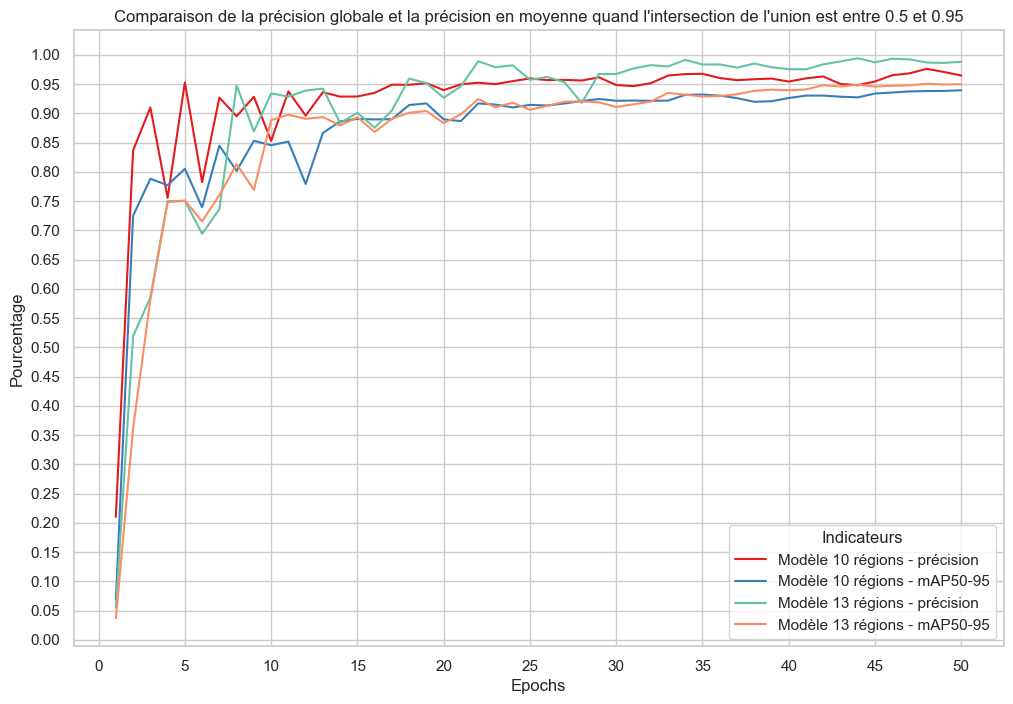

In [47]:
# Set up a custom color palette for each model
palette_model1 = sns.color_palette("Set1", n_colors=2)  # Change the number of colors as needed
palette_model2 = sns.color_palette("Set2", n_colors=2)  # Change the number of colors as needed

# Set up the Seaborn style with the custom palettes
sns.set(style="whitegrid", palette=[palette_model1[0], palette_model1[1], palette_model2[0], palette_model2[1]])


# Create a line plot for both precision and recall on the same axes
plt.figure(figsize=(12, 8))

# Precision plot for model 1
precision_plot_m1 = sns.lineplot(x='                  epoch', y='   metrics/precision(B)', data=df1, markers=True, label='Modèle 10 régions - précision')
# Recall plot for model 1
mAP_plot_m1 = sns.lineplot(x='                  epoch', y='    metrics/mAP50-95(B)', data=df1, markers=True, label='Modèle 10 régions - mAP50-95')

# Precision plot for model 2
precision_plot_m2 = sns.lineplot(x='                  epoch', y='   metrics/precision(B)', data=df2, markers=True, label='Modèle 13 régions - précision')
# Recall plot for model 2
mAP_plot_m2 = sns.lineplot(x='                  epoch', y='    metrics/mAP50-95(B)', data=df2, markers=True, label='Modèle 13 régions - mAP50-95')

# Set labels and title
plt.title("Comparaison de la précision globale et la précision en moyenne quand l'intersection de l'union est entre 0.5 et 0.95")
plt.xlabel('Epochs')
plt.ylabel('Pourcentage')

# Add more ticks to the axes
plt.xticks(range(0, 51, 5))  # Assuming you have 50 epochs
plt.yticks([i/20 for i in range(21)])  # Adjust the range based on your data

# Show the legend with a custom location and title
plt.legend(title='Indicateurs', loc='lower right')

# Show the plot
plt.savefig('precision_mAP_comparison.png', dpi=300)
plt.show()
